In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report


In [2]:

# Step 1: Load the data
train_df = pd.read_csv('data/train_test/ALBP/train_ALBP.csv')
test_df = pd.read_csv('data/train_test/ALBP/test_ALBP.csv')

# Separate features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Step 2: Preprocess the data
# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

print('Train: ' + str(len(X_train)) + ' Test: ' + str(len(X_test)))

Train: 2500 Test: 300


In [21]:

# # Step 3: Build the ANN model
# model = keras.Sequential([
#     keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(100, activation='softmax')  # 100 classes
# ])

# Step 3: Build the ANN model with optimizations
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(100, activation='softmax')  # 100 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\PC-MOH\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Step 5: Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=32)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9506 - loss: 1.9606 - val_accuracy: 0.3293 - val_loss: 21.0084
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9387 - loss: 1.8808 - val_accuracy: 0.3333 - val_loss: 21.8396
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9595 - loss: 1.7219 - val_accuracy: 0.3307 - val_loss: 23.5342
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9532 - loss: 1.8640 - val_accuracy: 0.3293 - val_loss: 24.1182
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9745 - loss: 1.5555 - val_accuracy: 0.3293 - val_loss: 24.2057
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9632 - loss: 1.7688 - val_accuracy: 0.3307 - val_loss: 26.0111
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9465 - loss: 1.9822 - val_accuracy: 0.3267 - val_loss: 23.5073
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9749 - loss: 1.4098 - val_accuracy: 0.3

In [29]:

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Step 7: Generate classification report
y_pred = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred)
y_test_labels = encoder.inverse_transform(y_test)
print(classification_report(y_test_labels, y_pred_labels))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 7.1574 
Test accuracy: 0.65
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       1.00      1.00      1.00         3
           3       0.33      1.00      0.50         3
           4       0.75      1.00      0.86         3
           5       0.43      1.00      0.60         3
           6       1.00      1.00      1.00         3
           7       0.60      1.00      0.75         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.50      1.00      0.67         3
          11       0.50      1.00      0.67         3
          12       0.75      1.00      0.86         3
          13       0.67      0.67      0.67         3
          14       0.60      1.00      0.75         3
          15       1.00      1.00      1.00         3
 

c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


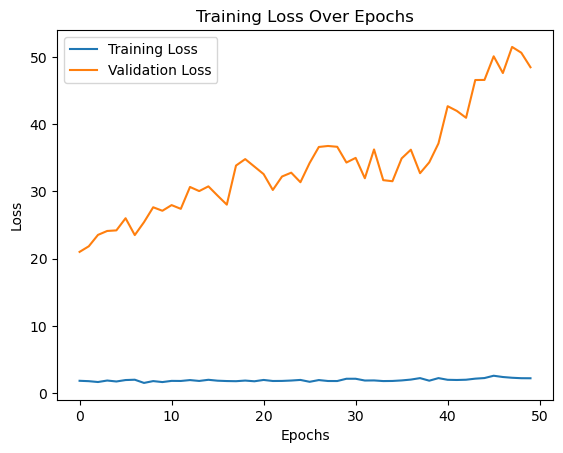

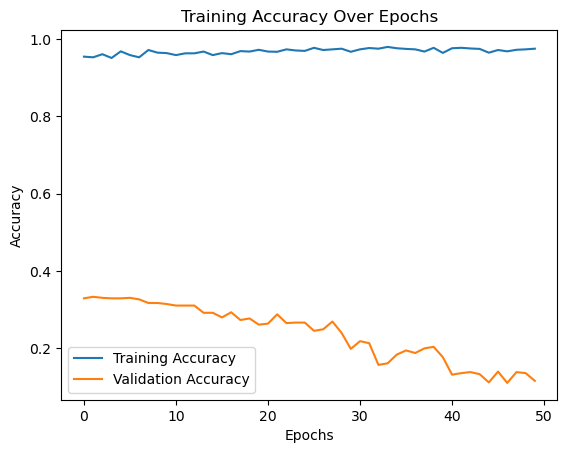

In [30]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Training loss over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training Accuracy Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot
